# Sorting images into three size groups

This script produces `.txt` files that contain the filenames of all images belonging to a certain size group that can be specified via thresholds.

In [23]:
import sys
import os
import random

# Get the current working directory
notebooks_dir = os.getcwd()

# Navigate up to the project directory
project_dir = os.path.dirname(notebooks_dir)

# Path to the `code` directory
code_dir = os.path.join(project_dir, 'code')  

# Add the code directory to the Python path
if code_dir not in sys.path:
    sys.path.insert(0, code_dir)

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from visualisation_utils import plot_image_and_mask, count_white_pixels

In [24]:
# Replace the absolute_path with the absolute path you want to set
absolute_path = "/Users/claire/Downloads/data/DUTS-TR_resized"

# Use os.chdir to change the working directory
os.chdir(absolute_path)

# Show current working directory
%pwd

'/Users/claire/Downloads/data/DUTS-TR_resized'

## Show examples of images and masks

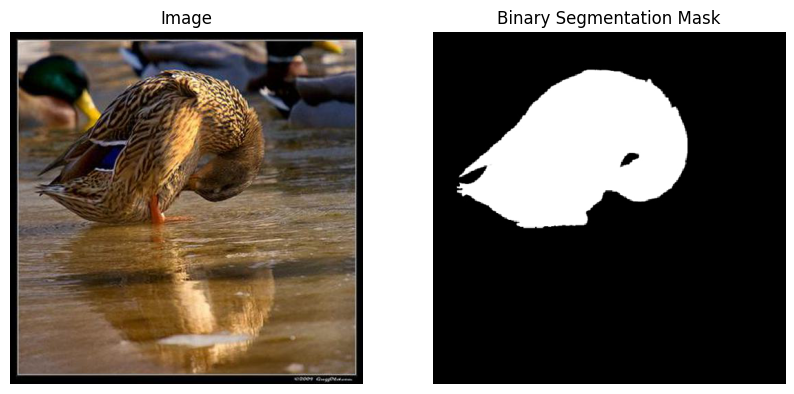

The number of white pixels in the mask is: 46907


In [25]:
# Replace these paths with the actual paths to your images and masks
image_path = '/Users/claire/Downloads/data/DUTS-TR_resized/img/ILSVRC2012_test_00000030.jpg'
mask_path = '/Users/claire/Downloads/data/DUTS-TR_resized/gt/ILSVRC2012_test_00000030.png'

plot_image_and_mask(image_path, mask_path)
white_pixel_count = count_white_pixels(mask_path)

print(f'The number of white pixels in the mask is: {white_pixel_count}')

## Function sorting images into three groups (small, medium, large)

In [70]:
def process_image_mask_pairs(img_folder, gt_folder, output_file_path, lower_threshold, upper_threshold):
    # Initialize a count variable to track the number of filenames written
    num_filenames_written = 0

    # Open the file in write mode, clearing existing content if the file exists
    with open(output_file_path, 'w') as output_file:
        # Iterate over all image files in the img folder
        for img_filename in os.listdir(img_folder):
            # Check if the file is a JPG image
            if img_filename.endswith('.jpg'):
                img_path = os.path.join(img_folder, img_filename)
                
                # Form the corresponding mask file path based on the image filename
                mask_filename = img_filename.replace('.jpg', '.png')
                mask_path = os.path.join(gt_folder, mask_filename)

                # Check if the mask file exists
                if os.path.exists(mask_path):
                    # Count white pixels in the mask
                    white_pixel_count = count_white_pixels(mask_path)

                    # Check if the count is within the specified thresholds
                    if lower_threshold <= white_pixel_count <= upper_threshold:
                        # Write the filenames to the output file
                        output_file.write(f'{img_filename[:-4]}\n') # Don't write right now, just find out how many images fall in the constraints
                        num_filenames_written += 1

    return num_filenames_written

In [96]:
img_folder_ECSSD = '/Users/claire/Downloads/data/ECSSD_resized/img'
gt_folder_ECSSD = '/Users/claire/Downloads/data/ECSSD_resized/gt'

img_folder_MSRA10K = '/Users/claire/Downloads/data/MSRA10K_resized/img'
gt_folder_MSRA10K = '/Users/claire/Downloads/data/MSRA10K_resized/gt'

img_folder_DUTS = '/Users/claire/Downloads/data/DUTS-TR_resized/img'
gt_folder_DUTS = '/Users/claire/Downloads/data/DUTS-TR_resized/gt'

# Replace this path with the desired output text file
output_file_path = [['/Users/claire/Downloads/data/ECSSD_resized/small.txt', '/Users/claire/Downloads/data/MSRA10K_resized/small.txt', '/Users/claire/Downloads/data/DUTS-TR_resized/small.txt'],
                    ['/Users/claire/Downloads/data/ECSSD_resized/medium.txt', '/Users/claire/Downloads/data/MSRA10K_resized/medium.txt', '/Users/claire/Downloads/data/DUTS-TR_resized/medium.txt'],
                    ['/Users/claire/Downloads/data/ECSSD_resized/large.txt', '/Users/claire/Downloads/data/MSRA10K_resized/large.txt', '/Users/claire/Downloads/data/DUTS-TR_resized/large.txt']]


# All numbers lead to 100 images per size
total_image_pixels = 512 * 512
percentage_of_image = [6.0, 25, 80]
epsilon = [3.018, 0.905, 19.262]

# Loop over small, medium, large
for i in range(3):
    lower_threshold = int(((percentage_of_image[i] - epsilon[i])/100) * total_image_pixels)
    upper_threshold = int(((percentage_of_image[i] + epsilon[i])/100) * total_image_pixels)

    print(f"Lower threshold: {lower_threshold} ({percentage_of_image[i] - epsilon[i]}% of the image)")
    print(f"Upper threshold: {upper_threshold} ({percentage_of_image[i] + epsilon[i]}% of the image)")

    # Call the function and get the number of filenames written
    num_files_ECSSD = process_image_mask_pairs(img_folder_ECSSD, gt_folder_ECSSD, output_file_path[i][0], lower_threshold, upper_threshold)
    print(f'Processing complete. {num_files_ECSSD} filenames written to: {output_file_path[i][0]}')
    num_files_MSRA10K = process_image_mask_pairs(img_folder_MSRA10K, gt_folder_MSRA10K, output_file_path[i][1], lower_threshold, upper_threshold)
    print(f'Processing complete. {num_files_MSRA10K} filenames written to: {output_file_path[i][1]}')
    num_files_DUTS = process_image_mask_pairs(img_folder_DUTS, gt_folder_DUTS, output_file_path[i][2], lower_threshold, upper_threshold)
    print(f'Processing complete. {num_files_DUTS} filenames written to: {output_file_path[i][2]}')

    print(f'Number of total filenames written: {num_files_ECSSD + num_files_MSRA10K + num_files_DUTS}')

print("Done. All size files written.")

Lower threshold: 7817 (2.982% of the image)
Upper threshold: 23640 (9.018% of the image)
Processing complete. 63 filenames written to: /Users/claire/Downloads/data/ECSSD_resized/small.txt
Processing complete. 326 filenames written to: /Users/claire/Downloads/data/MSRA10K_resized/small.txt
Processing complete. 611 filenames written to: /Users/claire/Downloads/data/DUTS-TR_resized/small.txt
Number of total filenames written: 1000
Lower threshold: 63163 (24.095% of the image)
Upper threshold: 67908 (25.905% of the image)
Processing complete. 44 filenames written to: /Users/claire/Downloads/data/ECSSD_resized/medium.txt
Processing complete. 536 filenames written to: /Users/claire/Downloads/data/MSRA10K_resized/medium.txt
Processing complete. 420 filenames written to: /Users/claire/Downloads/data/DUTS-TR_resized/medium.txt
Number of total filenames written: 1000
Lower threshold: 159221 (60.738% of the image)
Upper threshold: 260209 (99.262% of the image)
Processing complete. 59 filenames wr

In [101]:
import shutil

def create_new_dataset(source_folder, target_folder, dataset_txt):
    # Read the list of filenames from the .txt file
    with open(dataset_txt, 'r') as file:
        filenames = file.read().splitlines()

    # Create the target folder if it doesn't exist
    os.makedirs(target_folder, exist_ok=True)

    # Iterate over the filenames and copy corresponding images and ground truth masks
    for filename in filenames:
        # Construct the paths to the source images and ground truth masks
        img_path = os.path.join(source_folder, 'img', filename + '.jpg')  # Adjust the extension based on your images
        gt_path = os.path.join(source_folder, 'gt', filename + '.png')  # Adjust the extension based on your masks

        # Construct the paths to the target images and ground truth masks
        target_img_path = os.path.join(target_folder, 'img', filename + '.jpg')
        target_gt_path = os.path.join(target_folder, 'gt', filename + '.png')

        # Copy the images and ground truth masks to the target folder
        shutil.copy(img_path, target_img_path)
        shutil.copy(gt_path, target_gt_path)

# Example usage:
dataset1_folder = '/Users/claire/Downloads/data/ECSSD_resized'
dataset2_folder = '/Users/claire/Downloads/data/MSRA10K_resized'
dataset3_folder = '/Users/claire/Downloads/data/DUTS-TR_resized'
target_dataset_folder = '/Users/claire/Downloads/data/combined_large'

# Specify the .txt files for each dataset
ECSSD_txt = os.path.join(dataset1_folder, 'large.txt')
MSRA10K_txt = os.path.join(dataset2_folder, 'large.txt')
DUTS_txt = os.path.join(dataset3_folder, 'large.txt')

# Create the new dataset by combining images and ground truth masks
create_new_dataset(dataset1_folder, target_dataset_folder, ECSSD_txt)
create_new_dataset(dataset2_folder, target_dataset_folder, MSRA10K_txt)
create_new_dataset(dataset3_folder, target_dataset_folder, DUTS_txt)


## View examples of small, medium, and large object masks

['ILSVRC2013_test_00005500', 'ILSVRC2012_test_00037130', 'n04147183_14029', 'n04039381_8473', 'n01503061_613', 'n03445777_10127', 'ILSVRC2012_val_00006346', 'ILSVRC2013_test_00005718', 'n03134739_7765', 'n03494278_38730', 'n01744401_14359', 'n04026417_6554', 'n03775546_8149', 'n04146614_8693', 'n07718747_8806']


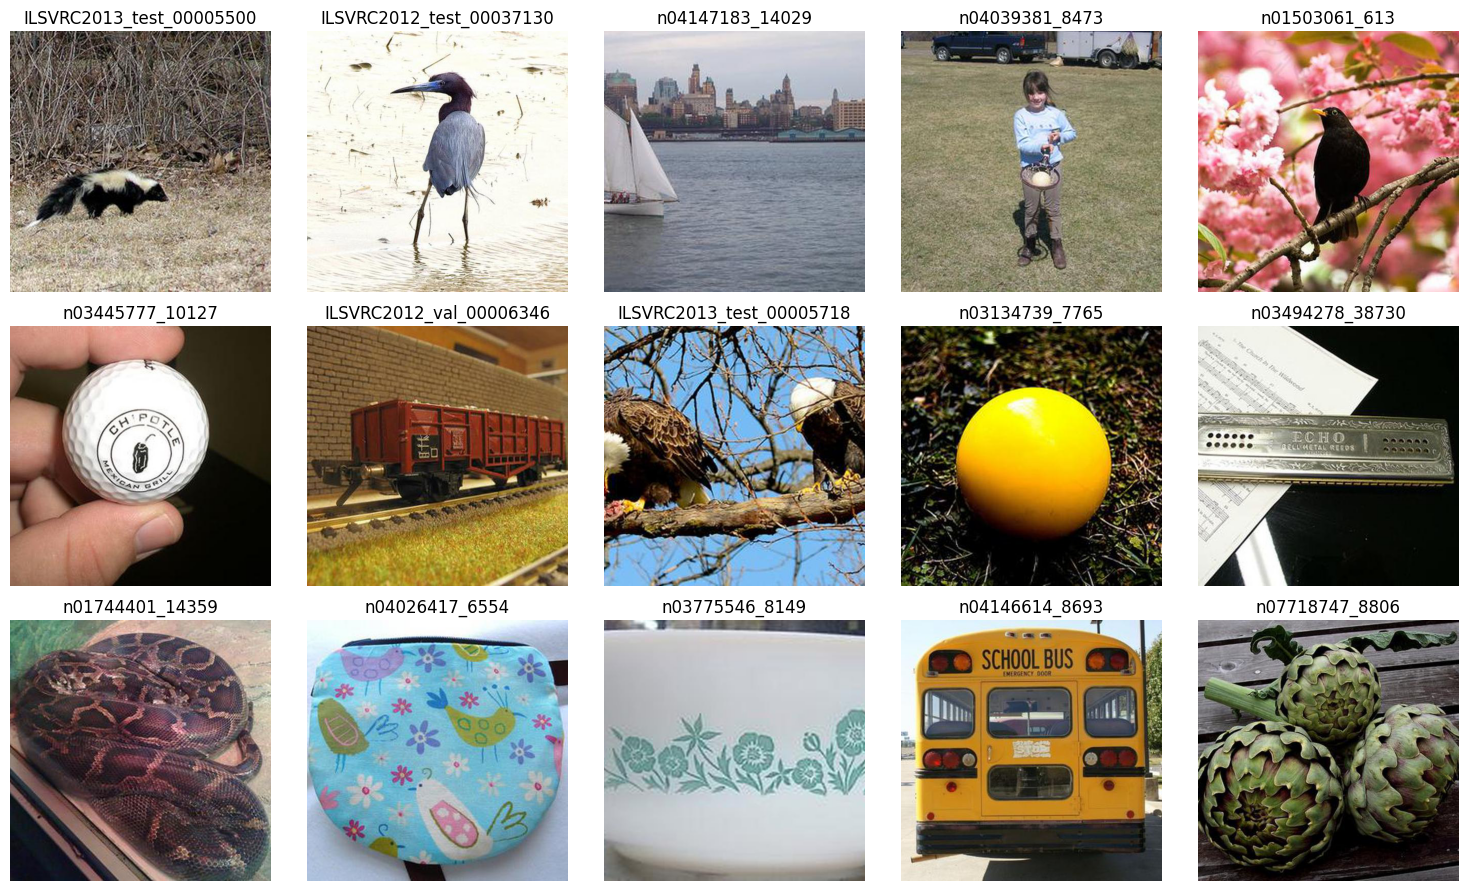

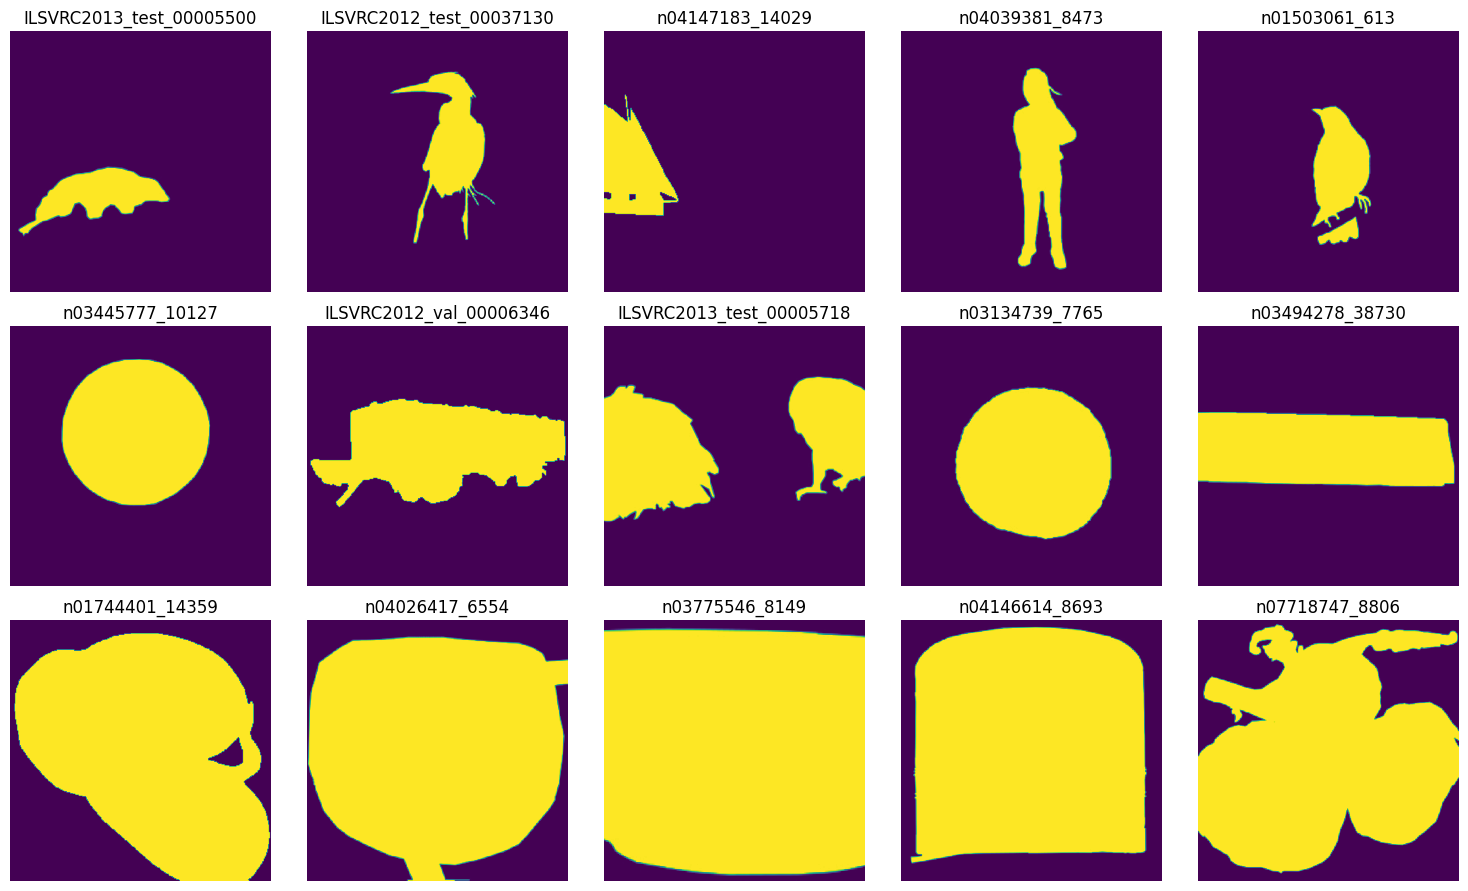

In [97]:
# Path to your .txt file
small_path = "small.txt"
medium_path = "medium.txt"
big_path = "large.txt"
# Path to the folder containing the images
image_folder = "img"
gt_folder = "gt"

selected_words = []
# Read the file and store words in a list
with open(small_path, "r") as file:
    words = file.read().splitlines()
selected_words.extend(random.sample(words, 5))

with open(medium_path, "r") as file:
    words = file.read().splitlines()
selected_words.extend(random.sample(words, 5))

with open(big_path, "r") as file:
    words = file.read().splitlines()
selected_words.extend(random.sample(words, 5))

print(selected_words)


# IMG
# Create a 3x5 grid for plotting
fig, axes = plt.subplots(3, 5, figsize=(15, 9))

# Iterate over selected words and plot corresponding images
for i, word in enumerate(selected_words):
    # Construct the full path to the image file
    image_path = os.path.join(image_folder, word + ".jpg")  # Adjust the extension based on your images

    # Check if the image file exists
    if os.path.exists(image_path):
        # Load and plot the image
        image = Image.open(image_path)
        axes[i // 5, i % 5].imshow(image)
        axes[i // 5, i % 5].axis("off")
        axes[i // 5, i % 5].set_title(word)
    else:
        print(f"Image corresponding to {word} not found.")

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

# GT
# Create a 3x5 grid for plotting
fig, axes = plt.subplots(3, 5, figsize=(15, 9))

# Iterate over selected words and plot corresponding images
for i, word in enumerate(selected_words):
    # Construct the full path to the image file
    image_path = os.path.join(gt_folder, word + ".png")  # Adjust the extension based on your images

    # Check if the image file exists
    if os.path.exists(image_path):
        # Load and plot the image
        image = Image.open(image_path)
        axes[i // 5, i % 5].imshow(image)
        axes[i // 5, i % 5].axis("off")
        axes[i // 5, i % 5].set_title(word)
    else:
        print(f"Image corresponding to {word} not found.")

# Adjust layout and display the plot
plt.tight_layout()
plt.show()